# Sympy: символьная математика в Python

### Базовый объект SymPy - символ. Алгебра символов эквивалентна алгебре функций действительной переменной

In [1]:
import sympy as sym 
sym.init_printing()

x, y = sym.symbols('\lambda \mu')

In [4]:
x

In [6]:
a = x + y + x
a

In [7]:
a -= x
a

In [8]:
a += (5*y + 12)
a

### В некотором роде SymPy - это библиотека функционального программирования, использующая философию 'ленивых вычислений'

In [9]:
from sympy import symbols

x = symbols('x')

f = x**2 + 5*x + 1
print(f)

x**2 + 5*x + 1


In [10]:
# для того, чтобы подставить в функции число, есть метод evalf
print(f.evalf(subs={x: 2}))

15.0000000000000


In [11]:
print((x + x + x).evalf(subs={x : 1}))

3.00000000000000


### Sympy умеет решать алгебраические уравнения, и не только. Иногда точно, иногда численно - за подробностями в документацию

In [14]:
from sympy import symbols, Eq, solve

x = symbols('x')

f = x**3 + 5 * x + 1
e = Eq(f, 1)
print(e)

Eq(x**3 + 5*x + 1, 1)


In [15]:
result = solve(e)
for i, root in enumerate(result):
    print(f'Root {i}: {root}')

Root 0: 0
Root 1: -sqrt(5)*I
Root 2: sqrt(5)*I


### Можно даже решить уравнение с параметром. Функционал библиотеки с лихвой покрывает программу ЕГЭ

In [16]:
from sympy import symbols, Eq, solve

x = symbols('x')

a = symbols('a')
f2 = x**2 + a * a * x
e2 = Eq(f2, 0)
print(e2)

result2_1 = solve(e2)
for i, root in enumerate(result2_1):
    print(f'Root {i}: {root}')



Eq(a**2*x + x**2, 0)
Root 0: {a: -sqrt(-x)}
Root 1: {a: sqrt(-x)}
Root 2: {x: 0}


In [17]:
a0 = 11
result2_2 = solve(e2, x)
for i, root in enumerate(result2_2):
    print(f'Root {i}: {root}')
    print(f'Root {i} computed for a = {a0}: {root.subs({a: a0})}')

Root 0: 0
Root 0 computed for a = 11: 0
Root 1: -a**2
Root 1 computed for a = 11: -121


### Sympy также умеет работать с матрицами. Поиграемся, например, с матрицей A в составе системы уравнений упругости в 2D. 

In [24]:
lmbda, mu, rho =  sym.symbols('\lambda \mu \rho')

A = sym.Matrix([
    [0., 0., 1/rho, 0., 0.],
    [0., 0., 0., 0., 1/rho],
    [lmbda + 2 * mu, 0., 0., 0., 0.],
    [lmbda, 0., 0., 0., 0.],
    [0., mu, 0., 0., 0.],
])


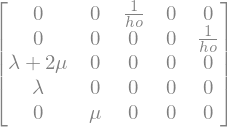

In [25]:
A

In [26]:
U, D = A.diagonalize()

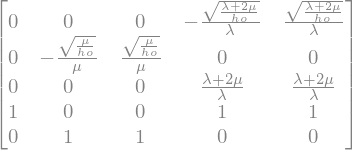

In [27]:
U

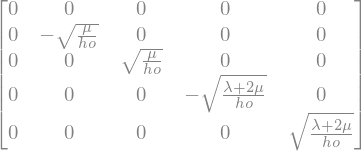

In [28]:
D

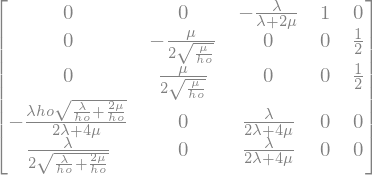

In [29]:
# так мы можем обратить матрицу
U.inv()

In [29]:
# проверим, что мы и вправду получили SVD 

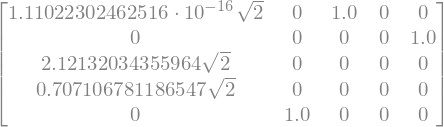

In [36]:
U.subs({lmbda: 1., mu: 1., rho: 1.}) * D.subs({lmbda: 1., mu: 1., rho: 1.}) * U.inv().subs({lmbda: 1., mu: 1., rho: 1.})

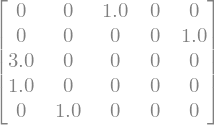

In [37]:
A.subs({lmbda: 1., mu: 1., rho: 1.})